### Theory of GAN (Generative Adversarial Networks):

GANs consist of two neural networks: a generator and a discriminator, which are trained simultaneously through a competitive process.

1. **Generator (G)**: This network takes random noise as input and generates fake data samples (in our case, fashion images).

2. **Discriminator (D)**: This network aims to distinguish between real (from the training set) and fake (generated by the generator) samples.

During training, the generator tries to produce samples that are indistinguishable from real data, while the discriminator tries to correctly classify real and fake samples. As training progresses, both networks improve until the generator produces high-quality samples.

### Building Generator and Discriminator Models for Fashion MNIST:

#### 1. Generator Model:
- Input: Random noise vector (latent space).
- Output: Synthetic fashion images.
- Architecture: Typically consists of transpose convolution layers followed by activation functions like ReLU and a sigmoid function at the output to scale pixel values between 0 and 1.

#### 2. Discriminator Model:
- Input: Fashion images (real or synthetic).
- Output: Probability of the input being real.
- Architecture: Convolutional layers followed by activation functions like LeakyReLU, and finally a sigmoid function to produce a probability score.

Let's code the generator and discriminator models:

```python
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Generator model
def build_generator(latent_dim):
    model = Sequential([
        
    ])
    return model

# Discriminator model
def build_discriminator(input_shape):
    model = Sequential([
    ])
    return model

```

These models define the architecture for the generator and discriminator. Now, you can train them using Fashion MNIST data. If you need help with training or further explanation, feel free to ask!

# 1. Importing Dependencies and Data

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
import keras


## 1.2 setting GPU memory Growth

In [2]:
# Setting GPU memory growth
gpus = tf.config.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.3 Download data from tensorflow dataset

In [3]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [10]:
# Use the tensorflow datasets api to bring in the data 
ds = tf.data.Dataset.from_tensor_slices((train_images))

In [12]:
ds.batch(128)

<BatchDataset element_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)>

# Visulise the data

In [13]:
# Setup connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [16]:
dataiterator.next()[0:].shape

(28, 28)

In [15]:
# Getting data out of the pipeline
image = dataiterator.next()[0:]

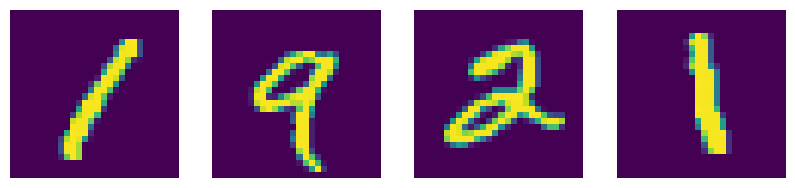

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your image batch is stored in a variable called 'images'
# Extracting the first image from the batch
fig, axes = plt.subplots(1, 4, figsize=(10, 12))


for i, ax in enumerate(axes.flat):
    image = dataiterator.next()[0:]
    # Reshape the image to remove the single dimension
    image = np.squeeze(image)
    ax.imshow(image)  # Assuming it's a grayscale image
    ax.axis('off')  # Turn off axis

plt.show()


In [19]:
# Scale and return images only
def scale_images(data):
    image = data['image']
    return image / 255

In [18]:
# Cache the dataset for that batch
ds = ds.cache()
# Shuffle it up
ds = ds.shuffle(60000)
# Batch into 128 images per sample
ds = ds.batch(128)
# Reduces the likelihood of bottlenecking
ds = ds.prefetch(64)

# 3. Build neural Network

In [19]:
# Bring in the Sequential api for the generator and discriminator
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , UpSampling2D , ReLU , LeakyReLU , Dropout , BatchNormalization , Reshape, Conv2DTranspose


## 3.1 Build Generator

In [20]:
def build_generator():
    model = Sequential([
        Dense(7 * 7 * 128, input_dim=128),
        LeakyReLU(0.2),
        Reshape((7, 7, 128)),

        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),

        UpSampling2D(),
        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),


        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, 5, padding='same'),
        LeakyReLU(alpha=0.2),
        BatchNormalization(),

        LeakyReLU(alpha=0.2),
        Conv2D(1 , 5, padding='same',activation="sigmoid")

    ])
    return model
generator = build_generator()
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 128)      512       
 ormalization)                                          

## 3.2 Visulise the generated image from generator

1/1 [==============================] - 1s 747ms/step


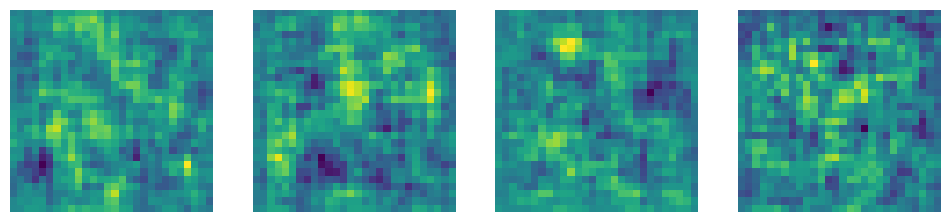

In [21]:
img = generator.predict(np.random.randn(4, 128,1))

# Choose random indices from the training dataset
random_indices = random.sample(range(len(ds)), 4)

# Plot the images
fig, ax = plt.subplots(1, 4, figsize=(12, 3))
for i, idx in enumerate(random_indices):
    ax[i].imshow(img[i].squeeze())  # Assuming grayscale images
    ax[i].axis('off')
plt.show()

## 3.3 Build Discriminator

In [22]:
def build_Dicriminator():
    model=Sequential([
        # First Conv Block
        Conv2D(32, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        # second conv Block
        Conv2D(64, 5, input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        #third conv Block
        Conv2D(128, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        # Forth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

         # Fifth Conv Block
        Conv2D(256, 5 , input_shape=(28,28,1)),
        LeakyReLU(0.2),
        Dropout(0.4),

        Flatten(),
        Dropout(0.4),
        Dense(1 , activation="sigmoid")

    ])
    return model

discriminator = build_Dicriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 128)      

In [23]:
discriminator.predict(img)

1/1 [==============================] - 0s 71ms/step


array([[0.50087625],
       [0.50080556],
       [0.5007726 ],
       [0.5007498 ]], dtype=float32)

# 4 Create Training Loops

## 4.1 Set Optimizers and Losses parameter

In [24]:
# Adam is going to be the optimizer for both
from keras.optimizers import Adam
# BinaryCrossentropy is going to be the optimizer for both
from keras.losses import BinaryCrossentropy

In [25]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [26]:
from keras.models import Model

## 4.2 Build Subclass Model

In [27]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [28]:
#Create instance of Subclass mode
fashgan=FashionGAN(generator , discriminator)

## 4.3 Compile the Model

In [29]:
# Compile the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

## 4.4 Build Callback

In [36]:
import os
from keras.callbacks import Callback
from keras.utils import array_to_img

In [45]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        super(ModelMonitor, self).__init__()
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim, 1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images = generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(f"generated_image_epoch_{epoch}_sample_{i}.png")


## 4.5 Train Model

In [46]:
hist = fashgan.fit(ds, epochs=100, callbacks=[ModelMonitor()])

Epoch 1/100
469/469 [==============================] - 379s 807ms/step - d_loss: 0.6953 - g_loss: 0.6718
Epoch 2/100
469/469 [==============================] - 385s 821ms/step - d_loss: 0.6924 - g_loss: 0.6616
Epoch 3/100
469/469 [==============================] - 395s 842ms/step - d_loss: 0.6972 - g_loss: 0.7063
Epoch 4/100
469/469 [==============================] - 391s 834ms/step - d_loss: 0.6945 - g_loss: 0.6960
Epoch 5/100
469/469 [==============================] - 402s 858ms/step - d_loss: 0.6935 - g_loss: 0.7040
Epoch 6/100
469/469 [==============================] - 403s 859ms/step - d_loss: 0.6936 - g_loss: 0.7023
Epoch 7/100
469/469 [==============================] - 395s 842ms/step - d_loss: 0.6802 - g_loss: 0.6534
Epoch 8/100
469/469 [==============================] - 374s 797ms/step - d_loss: 0.6961 - g_loss: 0.6973
Epoch 9/100
469/469 [==============================] - 374s 797ms/step - d_loss: 0.6143 - g_loss: 0.4821
Epoch 10/100
469/469 [==============================] -

Epoch 76/100
469/469 [==============================] - 308s 657ms/step - d_loss: 0.4217 - g_loss: 1.3491
Epoch 77/100
469/469 [==============================] - 306s 651ms/step - d_loss: 0.4239 - g_loss: 1.1920
Epoch 78/100
469/469 [==============================] - 301s 643ms/step - d_loss: 0.4335 - g_loss: 1.7360
Epoch 79/100
469/469 [==============================] - 302s 645ms/step - d_loss: 0.4263 - g_loss: 1.0606
Epoch 80/100
469/469 [==============================] - 301s 642ms/step - d_loss: 0.4177 - g_loss: 1.4872
Epoch 81/100
469/469 [==============================] - 302s 645ms/step - d_loss: 0.3859 - g_loss: 0.9373
Epoch 82/100
469/469 [==============================] - 302s 645ms/step - d_loss: 0.4019 - g_loss: 1.5073
Epoch 83/100
469/469 [==============================] - 303s 647ms/step - d_loss: 0.4544 - g_loss: 1.4949
Epoch 84/100
469/469 [==============================] - 305s 650ms/step - d_loss: 0.4390 - g_loss: 1.6703
Epoch 85/100
469/469 [========================

# 4.3 Review Performance

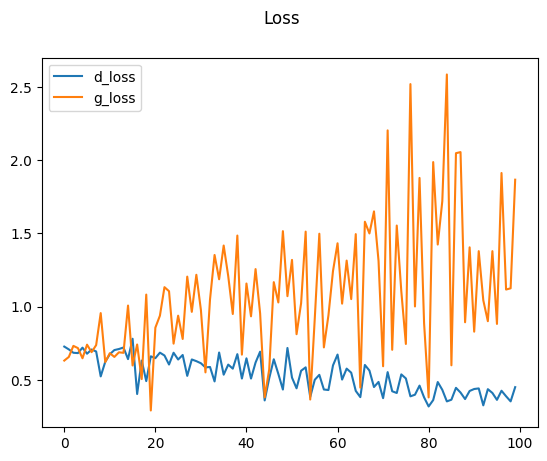

In [47]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='d_loss')
plt.plot(hist.history['g_loss'], label='g_loss')
plt.legend()
plt.show()

# 5. Test Out the Generator

## 5.1 Save the Model

In [48]:
generator.save('generator.h5')
discriminator.save('discriminator.h5')

In [64]:
generator.save('generator')
discriminator.save('discriminator')

INFO:tensorflow:Assets written to: generator\assets


INFO:tensorflow:Assets written to: generator\assets


INFO:tensorflow:Assets written to: discriminator\assets


INFO:tensorflow:Assets written to: discriminator\assets


## 5.2 Generate Images

In [51]:

img12 = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 80ms/step


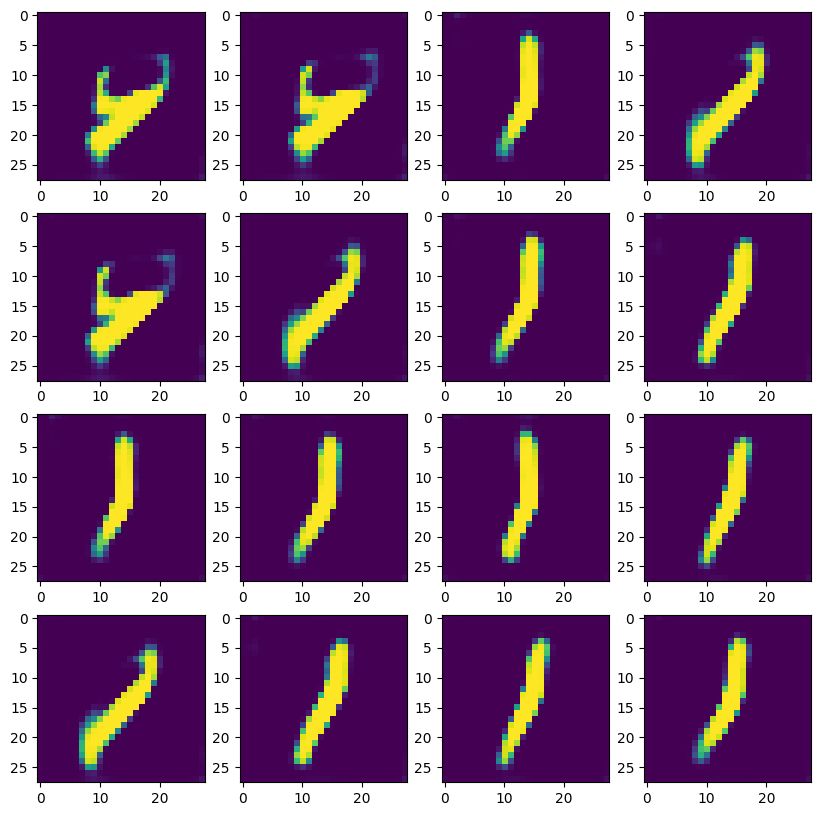

In [60]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(10,10))
for r in range(4):
    for c in range(4):
        ax[r][c].imshow(img12[(r+1)*(c+1)-1])

In [53]:
import pickle
with open('training_history.pkl', 'wb') as f:
    pickle.dump(hist.history, f)

In [58]:
   # Save optimizer states
with open(os.path.join('g_opt_state.pkl'), 'wb') as f:
    pickle.dump(g_opt.get_config(), f)
with open(os.path.join('d_opt_state.pkl'), 'wb') as f:
    pickle.dump(d_opt.get_config(), f)

In [63]:
weights_path = "model_weights.h5"

# Save the weights
fashgan.save_weights(weights_path)
